In [21]:
!pip install chart_studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
tes= pd.read_csv("SAUDI ARAMCO_2222.csv")
tes.head()

,date,open,high,low,close,change,change_percent,volume_traded,value_traded_SAR,number_trades
0,2020-03-19,28.85,29.60,28.55,29.35,0.35,1.21,15896191.0,4.662140e+08,13363
1,2020-03-18,29.10,29.95,28.95,29.00,-0.10,-0.34,13226989.0,3.876718e+08,12572
2,2020-03-17,27.80,29.75,27.80,29.10,1.30,4.68,16788027.0,4.840086e+08,15117
3,2020-03-16,28.10,28.30,27.65,27.80,-0.90,-3.14,12439061.0,3.475221e+08,15093
4,2020-03-15,28.95,29.75,28.55,28.70,-0.30,-1.03,15877147.0,4.598226e+08,12781


In [23]:
tes.info()
tes = tes.dropna()
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              72 non-null     object 
 1   open              72 non-null     float64
 2   high              72 non-null     float64
 3   low               72 non-null     float64
 4   close             72 non-null     float64
 5   change            72 non-null     float64
 6   change_percent    72 non-null     float64
 7   volume_traded     72 non-null     float64
 8   value_traded_SAR  72 non-null     float64
 9   number_trades     72 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              72 non-null     object 
 1   open              72 n

In [24]:
tes['date']= pd.to_datetime(tes['date'])

In [25]:
print(f'Dataframe stocks between: {tes.date.min()} - {tes.date.max()}')
print(f'Total days= {(tes.date.max() - tes.date.min()).days} days')

Dataframe stocks between: 2019-12-11 00:00:00 - 2020-03-19 00:00:00
Total days= 99 days


In [26]:
tes.describe()

,open,high,low,close,change,change_percent,volume_traded,value_traded_SAR,number_trades
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01,7.200000e+01,72.000000
mean,33.743750,34.000000,33.402778,33.709722,-0.036806,-0.088889,2.386873e+07,8.436247e+08,17231.083333
std,2.287657,2.058664,2.287657,2.146741,0.795807,2.521533,5.162241e+07,1.961499e+09,19338.410354
min,27.000000,28.300000,27.000000,27.800000,-3.000000,-9.090000,3.969243e+06,1.310389e+08,4576.000000
25%,33.162500,33.300000,32.937500,33.175000,-0.250000,-0.672500,7.620690e+06,2.577454e+08,8435.750000
50%,34.100000,34.225000,34.025000,34.175000,-0.100000,-0.290000,1.140926e+07,3.861161e+08,11899.000000
75%,35.000000,35.075000,34.625000,34.887500,0.150000,0.432500,1.907064e+07,6.532912e+08,15930.750000
max,38.700000,38.700000,37.500000,38.000000,3.200000,10.000000,4.179278e+08,1.586582e+10,144708.000000


<Axes: >

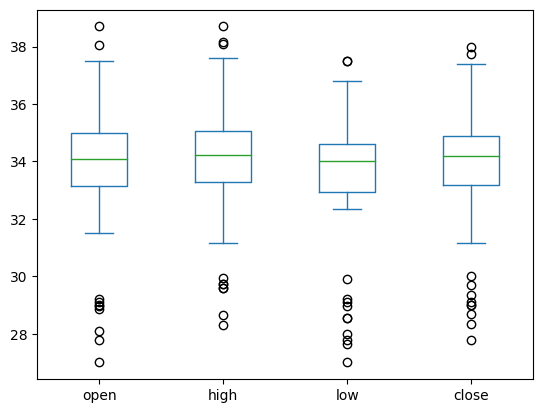

In [27]:
tes[['open','high','low','close']].plot(kind = 'box')

<Axes: xlabel='date'>

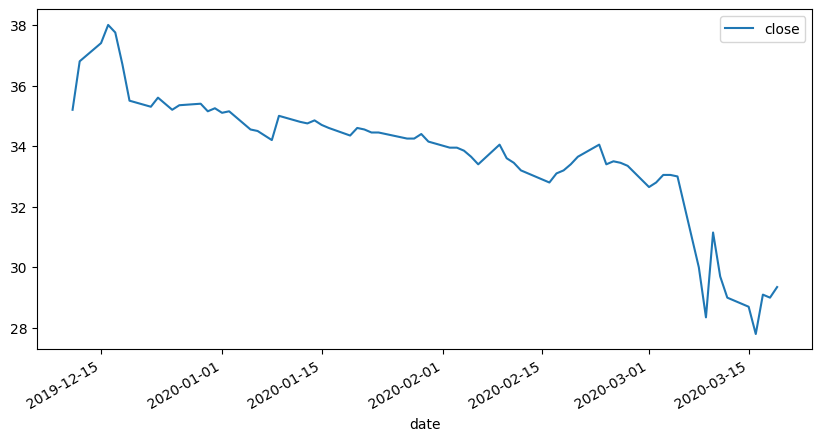

In [28]:
# Settting the Layout for plot
df=pd.DataFrame(tes)
df.plot.line(x='date',y='close', figsize=(10,5))

In [29]:
# Building the regression model
from sklearn.model_selection import train_test_split
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#For model evaluation I
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [30]:
# Split the data into train and test sets
X = np.array(tes.index).reshape(-1,1)
Y = tes['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [31]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [34]:
#Plot actual and predicted values for train dataset
trace0= go.Scatter(
x = X_train. T[0],
y = Y_train,
mode= 'markers',
name = 'Actual'
)
trace1= go.Scatter(
x = X_train. T[0],
y = lm. predict (X_train).T,
mode= 'lines',
name = 'Predicted'
)
tes= [trace0, trace1]
layout.xaxis.title.text= 'Day'
plot2 = go.Figure(data=tes_data, layout=layout)

In [35]:
iplot(plot2)

In [36]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust (10)} {'Train'.center (20)}{'Test'.center(20)}
{'r2_score'.ljust (10)} {r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)} {mse (Y_train, lm.predict (X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print (scores)


Metric            Train                Test        
r2_score   0.7613944065910613	0.7207871065078519
MSE        0.9909137586693442	1.2880540747984779

